<a href="https://colab.research.google.com/github/BilalKhaliqWillis/BILAL-Assignment2/blob/main/BILAL_Assignment10Midterm_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Assignment 10 – Midterm Project:- Diabetes Disease Progression Prediction
# Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Review of Machine Learning Concepts
"""
Supervised Learning:-
- It uses labeled data i.e.features + target.
- Regression predicts continuous values.

Key Components are: -
- Features (X): Input variables
- Target (y): Disease progression
- Model Training: Learning patterns from data
- Evaluation: Measuring performance
- Prediction: Estimating unseen data
"""

'\nSupervised Learning:-\n- It uses labeled data i.e.features + target.\n- Regression predicts continuous values.\n\nKey Components are: -\n- Features (X): Input variables\n- Target (y): Disease progression\n- Model Training: Learning patterns from data\n- Evaluation: Measuring performance\n- Prediction: Estimating unseen data\n'

In [3]:
# Loading the Diabetes Dataset
diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

df = pd.DataFrame(X, columns=diabetes.feature_names)
df['target'] = y

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [4]:
# Exploratory Data Analysis (EDA)
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


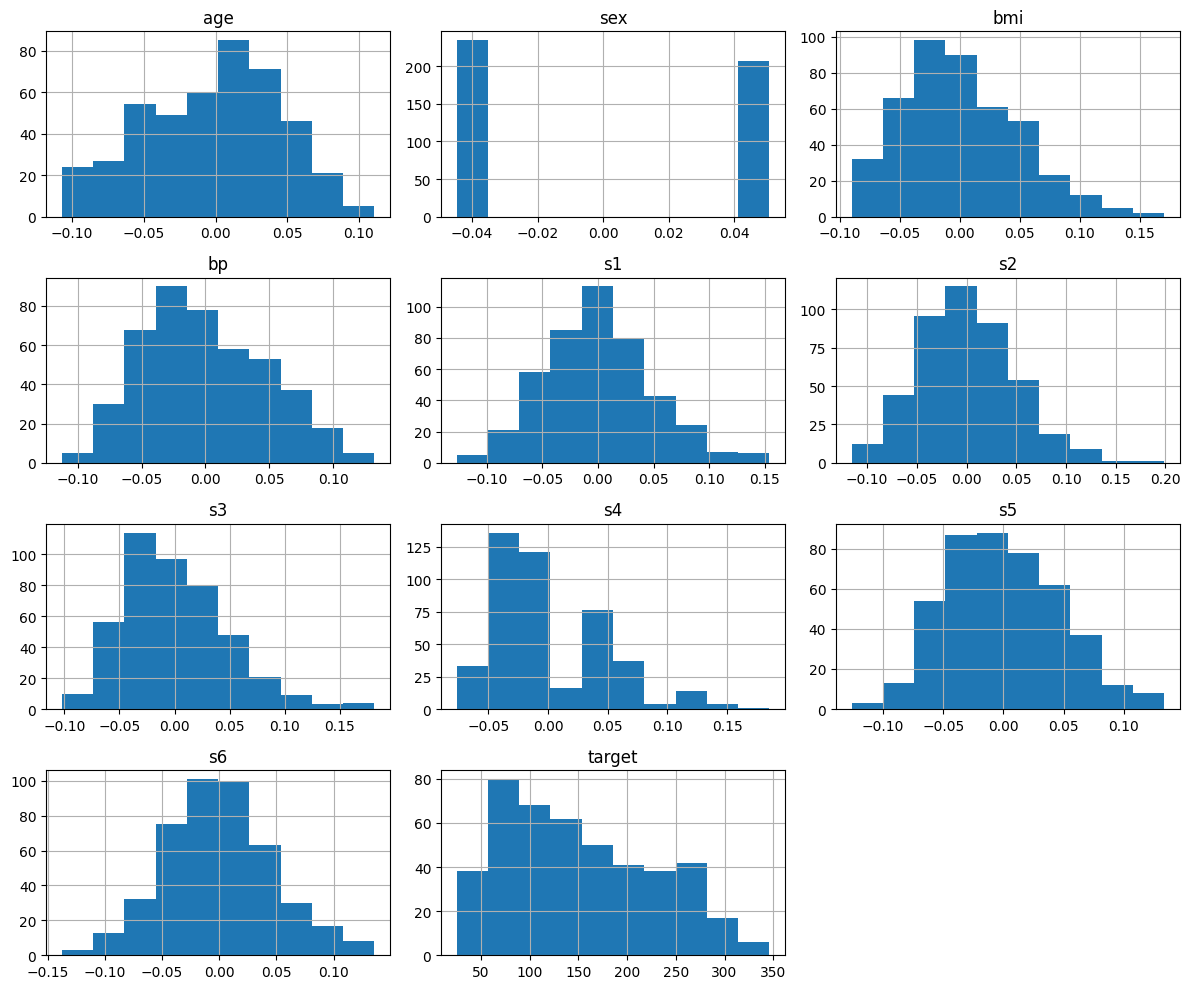

In [5]:
# Feature Distribution Visualization
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

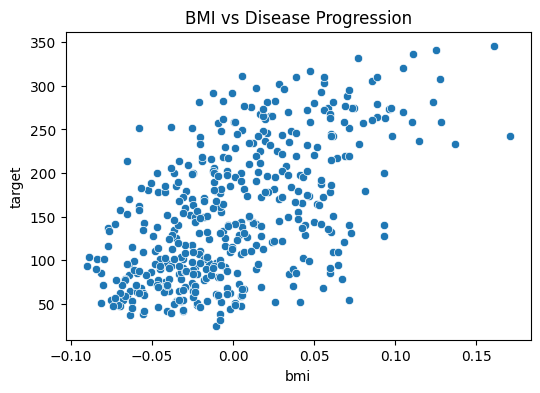

In [6]:
# Feature vs Target Relationship
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['bmi'], y=df['target'])
plt.title("BMI vs Disease Progression")
plt.show()

In [7]:
# Checking Missing Values
df.isnull().sum()

# No missing values are in this current dataset.

,0
age,0
sex,0
bmi,0
bp,0
s1,0
s2,0
s3,0
s4,0
s5,0
s6,0


In [8]:
# Train-Test Split
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [10]:
# Feature Scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Baseline Model – Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

In [12]:
# Evaluation Function
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    return mse, rmse, mae, r2

In [13]:
# Linear Regression Performance
evaluate_model(y_test, y_pred_lr)

(2900.1936284934823,
 np.float64(53.853445836765935),
 42.79409467959994,
 0.45260276297191926)

In [14]:
# Advanced Models
models = {
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results[name] = evaluate_model(y_test, y_pred)

results_df = pd.DataFrame(results, index=['MSE','RMSE','MAE','R2'])
results_df

,Ridge,Lasso,Decision Tree,Random Forest
MSE,2892.014566,2884.624289,4887.000000,2959.180562
RMSE,53.777454,53.708698,69.907081,54.398351
MAE,42.811999,42.805234,53.921348,44.171236
R2,0.454147,0.455541,0.077603,0.441469


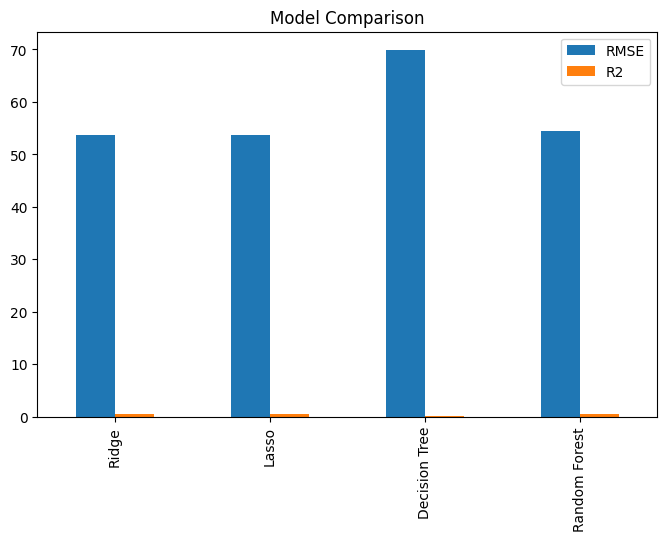

In [15]:
# Model Performance Visualization
results_df.T[['RMSE','R2']].plot(kind='bar', figsize=(8,5))
plt.title("Model Comparison")
plt.show()

In [16]:
# Hyperparameter Tuning -Ridge Regression
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(Ridge(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

grid.best_params_

{'alpha': 10}

In [17]:
# Tuned Ridge Evaluation
best_ridge = grid.best_estimator_
y_pred_best = best_ridge.predict(X_test_scaled)

evaluate_model(y_test, y_pred_best)

(2875.7787184218428,
 np.float64(53.62628756889519),
 42.85682524780061,
 0.4572109567780849)

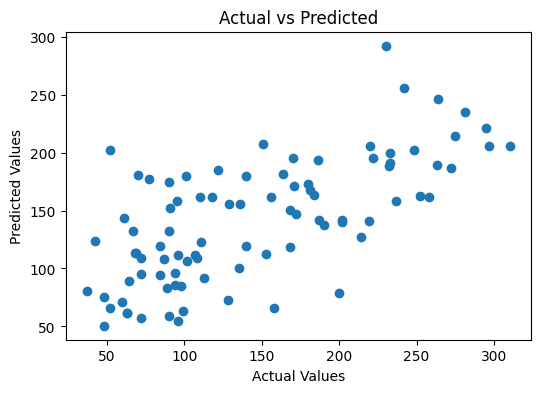

In [18]:
# Actual vs Predicted Plot
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_best)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()

In [19]:
# Feature Importance -Linear Regression
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
}).sort_values(by='Coefficient', ascending=False)

coef_df

,Feature,Coefficient
8,s5,35.161195
2,bmi,25.607121
5,s2,24.640954
3,bp,16.828872
7,s4,13.138784
6,s3,7.676978
9,s6,2.351364
0,age,1.753758
1,sex,-11.511809
4,s1,-44.448856


In [21]:
# Interpretation and Ethical Considerations
"""
Key Findings:-
- BMI is proven one of the most famous features.
- Ensembling models will improve the accuracy however it reduces interpretability.

Ethical Considerations:-
- Avoiding any kind of biased predictions.
- Ensureing that the patient has right to privacy.
- Using the predictions to assist and not replace the medical professionals.
"""

'\nKey Findings:-\n- BMI is proven one of the most famous features.\n- Ensembling models will improve the accuracy however it reduces interpretability.\n\nEthical Considerations:-\n- Avoiding any kind of biased predictions.\n- Ensureing that the patient has right to privacy.\n- Using the predictions to assist and not replace the medical professionals.\n'